In [7]:
from scipy.optimize import curve_fit
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import numpy as np
from run_evolution_experiment import DataFromExperiment
with open('experiment_data/and.pickle', 'rb') as f:
        data = pickle.load(f)

In [8]:
size_to_index_dict = {size: index for index, size in enumerate(data.sizes)}

[4.53353107]
[0.28694773]
r^2 =  0.9093371144618289


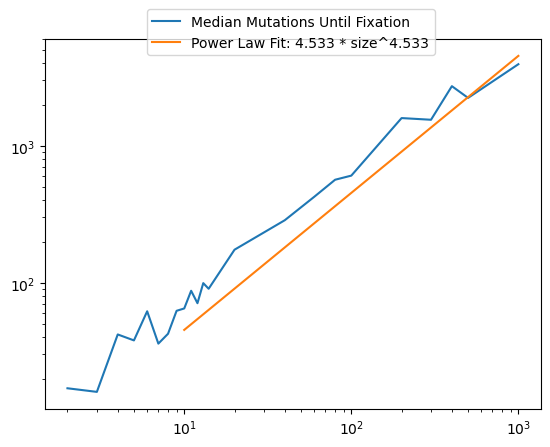

In [24]:
# Now this is what i need to fit a powerlaw plot
def power_law(x, a, b):
    return a*np.power(x, b)

pars_mutations, cov_mutations = curve_fit(f=power_law, xdata=data.sizes[size_to_index_dict[10]:], ydata=data.medians_mutations[size_to_index_dict[10]:], p0=[0,0], bounds=(-np.inf, np.inf))
print(pars_mutations)
perr_mutations = np.sqrt(np.diag(cov_mutations))
print(perr_mutations)
print("r^2 = ", metrics.r2_score(data.medians_mutations[size_to_index_dict[10]:], power_law(data.sizes[size_to_index_dict[10]:], *pars_mutations)))
fig, ax = plt.subplots(1, 1)
ax.loglog(data.sizes, data.medians_mutations,  label="Median Mutations Until Fixation")
ax.loglog(data.sizes[size_to_index_dict[10]:], power_law(data.sizes[size_to_index_dict[10]:], *pars_mutations), label="Power Law Fit: " +str(pars_mutations[0])[:5] +" * size^" +str(pars_mutations[1])[:5])
ax.legend(bbox_to_anchor=(0.8, 1.1))
fig.savefig('medianMutationsTillFixationAndWithFittedPlot.png', dpi=1200)
plt.show()

[4.39598602e-05 1.41890283e-02]
[-1.71507615e-04  3.58745699e-01]
r^2 =  0.5393564303955787


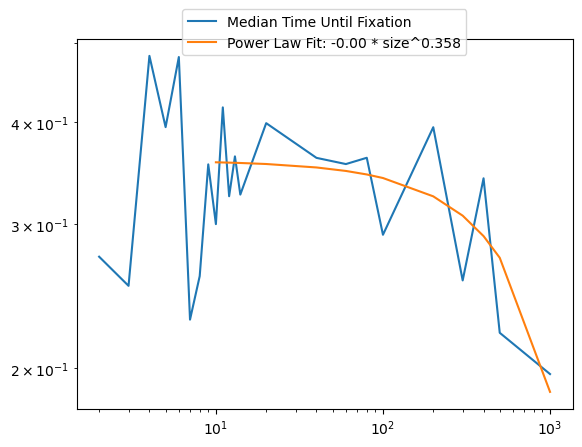

In [10]:
pars_time, cov_times = curve_fit(f=power_law, xdata=data.sizes[size_to_index_dict[10]:], ydata=data.medians_times[size_to_index_dict[10]:], p0=[0,0], bounds=(-np.inf, np.inf))
perr_times = np.sqrt(np.diag(cov_times))
print(perr_times)
fig, ax = plt.subplots(1, 1)
print(pars_time)
print("r^2 = ", metrics.r2_score(data.medians_times[size_to_index_dict[10]:], power_law(data.sizes[size_to_index_dict[10]:], *pars_time)))
ax.loglog(data.sizes, data.medians_times, label="Median Time Until Fixation")
ax.loglog(data.sizes[size_to_index_dict[10]:], power_law(data.sizes[size_to_index_dict[10]:], *pars_time), label="Power Law Fit: " +str(pars_time[0])[:5] +" * size^" +str(pars_time[1])[:5])
ax.legend(bbox_to_anchor=(0.8, 1.1))
fig.savefig('medianTimeTillFixationAndWithFittedPlot.png', dpi=1200)
plt.show()